# Count a specific spaced k-mer 

In [15]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from Bio import SeqIO
import sys
import glob
import matplotlib.patches as mpatches
import pickle
import itertools 
from numpy import arange
import argparse
from scipy.stats import nbinom

In [16]:
def parse_fastq(file_name):
    input_seq_iterator = SeqIO.parse(file_name, "fastq")
    return [str(record.seq) for record in input_seq_iterator]

def parse_fasta(file_name):
    input_seq_iterator = SeqIO.parse(file_name, "fasta")
    return [str(record.seq) for record in input_seq_iterator]

def parse_seq(file_name):
    with open(file_name,'r') as f:
        seq = [line.rstrip() for line in f]
    return seq

In [17]:
sequences = parse_fasta('positives_toy.fasta')
core1 = 'TAG'
core2 = 'ACT'

In [18]:
pickle_dir = 'pickles'
data_dir = 'data'

#normalize = '0' #normalize with 'input' or 'mock'
core_size = 3
k_range = range(core_size*2,35) #kmer size


def count_bipartite_stats(p_name, bg_name, k_range):
    bases = ['A','C','G','T'] 
    p_k_counts = np.zeros(len(k_range))
    bg_k_counts = np.zeros(len(k_range))
        
    for i, k in enumerate(k_range):
       
        p_kmer_file = os.path.join(data_dir,f'{p_name}_{k}mer.txt')
        bg_kmer_file = os.path.join(data_dir,f'{bg_name}_{k}mer.txt')

        p_counts = pd.read_table(p_kmer_file, header=None, sep='\t', index_col=0).sort_index()
        p_counts.columns = ['count']
        
        for inx in p_counts.index:
            if inx[:core_size] == core1:
                if inx[-core_size:] == core2:
                    p_k_counts[i] += p_counts.loc[inx,'count']
                    
        bg_counts = pd.read_table(bg_kmer_file, header=None, sep='\t', index_col=0).sort_index()
        bg_counts.columns = ['count']
                    
        for inx in bg_counts.index:
            if inx[:core_size] == core1:
                if inx[-core_size:] == core2:
                    bg_k_counts[i] += bg_counts.loc[inx,'count']       

        if False:
            print(f'for distance={k-2*core_size}, positive counts:{p_k_counts}, background counts:{bg_k_counts}')

    return p_k_counts, bg_k_counts

In [27]:
p_counts, bg_counts = count_bipartite_stats('positives_toy', 'negatives_toy', k_range=np.arange(6,35))

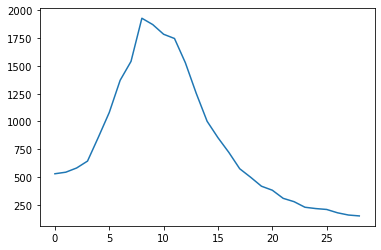

In [28]:
plt.plot(p_counts)

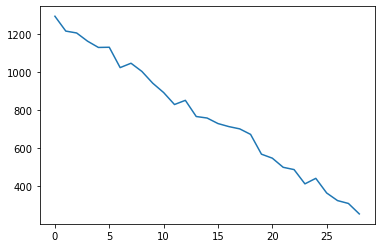

In [29]:
plt.plot(bg_counts)

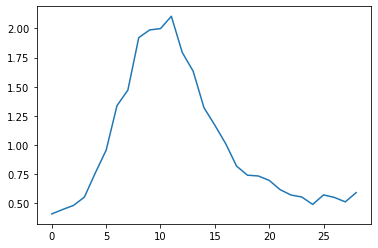

In [30]:
plt.plot(p_counts/bg_counts)

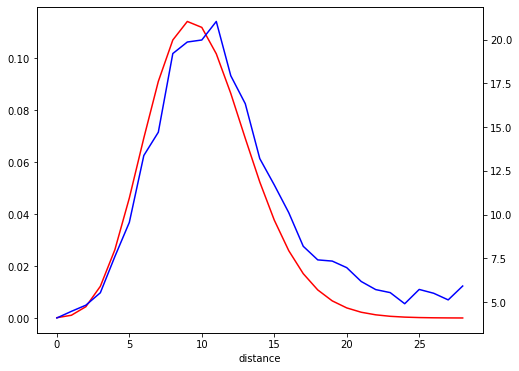

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

xx = np.arange(len(p_counts))
    
n_orig = 40
p_orig = 0.8
ax.plot(xx, nbinom.pmf(xx, n_orig, p_orig), color='red')
ax.set_xlabel('distance')

ax2 = ax.twinx()
ax2.plot(p_counts/bg_counts*10, color='b')

In [26]:
np.savetxt(fname='data/motif_enrichment_by_distance.txt', X=p_counts/bg_counts*10)